## Кривоногов Н.В., NLP, практическое задание № 4

Как альтернатива можно скачать данные из Роспотребнадзора
https://zpp.rospotrebnadzor.ru/Forum/Appeals
для этого берём ноутбук `parse_rospotrebnadzor.ipynb`
устанавливаем количество скачанных страниц больше не 50-сят хотябы 500 и для анализа берём только вопросы так как ответы есть не всегда

что надо сделать
1. объединить в одну выборку (это только для твитов), для роспотребнадзора сформировать датасет из вопросов
2. провести исследование и выявить тематики о которых говорят в твитах (для твитов), а для роспотребнадзора так же выявить тематики о которых люди пишут проанализировать
3. сделать визуализацию кластеров тематик
4. проинтерпритировать получившиеся тематики

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1)

In [2]:
df = pd.read_csv('question.csv')

df

,question
0,"На перекрестке улиц Генкиной и Ижорской в Нижнем Новгороде уже который день ведутся ремонтные работы в будние дни по ночам. Работы ведутся крайне шумно и мешают спать многочисленным жильцам в прилегающих в максимальной близости многоэтажных домах. Рабочие дробят асфальт, бьют молотом по металлу и производят другие крайне шумные работы. Машины стоят с включёнными двигателями."
1,"Добрый день! Просьба принять жалобу на точку питания шаурма ""на труда"", расположенную по адресу: Челябинская область, г. Челябинск, ​Проспект Победы, 396 ст1\r\n30.07.2023 сделали заказ \r\n31.07.2023 человека забрали с острым отравлением в инфекционное отделение \r\n02.08.2023 уже с отравлением лежу я \r\nтакже просмотрели отзывы от этих чисел и люди массово жалуются на отравления!\r\nпросьба принять меры к этому заведению."
2,"Заказывали коллективом шаурму заведение г.Челябинска «на Труда» по адресу: Труда 148. На следующей день все с диареей! Зашла в отзывы этого кафе, у всех кто заказывал в эти дни с данного заведения, такая же история"
3,"Я оплатил услуги связи в том числе за 25гигабайтов интернета и часть гигабайтов получал со своего телефона на свой же планшет. Но МТС поставил запрет на раздачу при остатке на моем телефоне в 10,5гигабайт.считаю в праве пользоваться оплаченым обьемом информации на свое усмотрение."
4,"В магазине ""Валентинка"" находившийся по адресу Кировская обл. Яранский район, с.Первомайское ул.Свободы д.2 торгуют некачественной продукцией (просрочкой). Хочу чтобы этот магазин проверили."
...,...
2490,"\r\nДобрый день!\r\nПрошу рассмотреть мою жалобу и порядок работы Сбермаркета. За период пользования сервисом я 3 раза оказывалась в неприятной ситуации, когда мой заказ доставляется на 2-3 часа позже указанного времени. В частности, вчера 20 ноября я сделала заказ в приложении на время доставки 21 ноября с 10 утра до 12 дня. Согласно статуса в приложении собран мой заказ был примерно в 09.40, но доставили его только в 14:09, за это время я вынуждена была изменить свои планы, так как операторы постоянно называли «выдуманное» время приезда курьера и всегда, конечно, ошибались. На мои вопросы прояснить ситуацию, чтобы я могла спланировать свой день, они бросали трубку. Итак, операторов было 3 человека за время с 12 дня, с момента моего первого звонка. По итогу, кроме словесных извинений я никак не смогла добиться решения моего вопроса по ускорению доставки. Боюсь, что без вмешательства гос. органов порядок работы сервиса не изменится."
2491,"По адресу г. ОВОСИБИРСК, УЛ. 1905 ГОДА, 85 Отопление отсутсвует с 3 часов ночи 21.11.22 . В 18.00 ни отопление ни горячую воду не включили. Нарушены нормативы по отсутствию отопления в жилых помещениях, мы вынуждены обогреваться обогревателями от электрических сетей, при этом, чтобы сделать перерасчет отсутствие отопления еще нужно доказать. То есть я должна была ночью пригласить, причем щаранее работников жэу к себе домой и зафиксировать факт отключения. Иначе отказываются делать перерасчет. И за электричество, потраченное на обогрев никто не компенсирует счета."
2492,"По адресу г. ОВОСИБИРСК, УЛ. 1905 ГОДА, 85 Отопление отсутсвует с 3 часов ночи 21.11.22 . В 18.00 ни отопление ни горячую воду не включили. Нарушены нормативы по отсутствию отопления в жилых помещениях, мы вынуждены обогреваться обогревателями от электрических сетей, при этом, чтобы сделать перерасчет отсутствие отопления еще нужно доказать. То есть я должна была ночью пригласить, причем щаранее работников жэу к себе домой и зафиксировать факт отключения. Иначе отказываются делать перерасчет. И за электричество, потраченное на обогрев никто не компенсирует счета."
2493,"Меня зовут Квитка И.А., \r\n11.10.2022 во дворе моего дома произошло ДТП, с участием моего авто. Виновнк ДТП вызвал сотрудников полиции, а те в свою очередь оформили документы и 13.10.2022 выдали мне постановление. \r\nС протоколом я обратилась в компанию ОСАГО Тинькофф за согласованием ремонта моей машины. Я выбрала получить ремонт, а не деньги. 

In [3]:
!pip install pymorphy2

In [4]:
import numpy as np
import re
import string
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [5]:
nltk.download('stopwords')
words_regex = re.compile('\w+')
morph = MorphAnalyzer()
my_stopwords = ['здравствуйте', 'добрый', 'день', 'вопрос', 'роспотребнадзор', 'либо', 'месяц',
                'течение', 'данный', 'это', 'просить', 'сказать', 'год', 'адрес', 'обращение', 'мочь', 'иметь', 'человек',
                'право', 'санкт' ,'петербург', 'ноябрь', 'декабрь', 'ооо', 'свой', 'всё', 'дать', 'первый', 'надлежащий',
                'который', 'область', 'город', 'пора', 'весь', 'пожалуйста', 'подсказать', 'оказаться', 'никто', 'январь']

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian') + my_stopwords

# mystem = Mystem()
# def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
#     lemmas = lemmer.lemmatize(' '.join(words))
#     return [w for w in lemmas if not w in stopwords
#             and w.isalpha()]

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.question.iloc[1]

'Добрый день! Просьба принять жалобу на точку питания шаурма "на труда", расположенную по адресу: Челябинская область, г. Челябинск,  \u200bПроспект Победы, 396 ст1\r\n30.07.2023 сделали заказ \r\n31.07.2023 человека забрали с острым отравлением в инфекционное отделение \r\n02.08.2023 уже с отравлением лежу я \r\nтакже просмотрели отзывы от этих чисел и люди массово жалуются на отравления!\r\nпросьба принять меры к этому заведению.'

In [7]:
print(preprocess(df.question.iloc[1]))

['просьба', 'принять', 'жалоба', 'точка', 'питание', 'шаурм', 'труд', 'расположить', 'челябинский', 'челябинск', 'проспект', 'победа', 'сделать', 'заказ', 'забрать', 'острый', 'отравление', 'инфекционный', 'отделение', 'отравление', 'лежать', 'также', 'просмотреть', 'отзыв', 'число', 'массово', 'жаловаться', 'отравление', 'просьба', 'принять', 'мера', 'заведение']


In [8]:
preprocessed_text = list(tqdm(map(preprocess, df['question']), total=len(df)))

  0%|          | 0/2495 [00:00<?, ?it/s]

In [9]:
df['preprocessed_text'] = preprocessed_text

df.sample(3)

,question,preprocessed_text
233,"Здравствуйте! Отправляю Вам скан обращения, которое передано уже в ЖЭУ и отдел полиции. Сказали, что надо обратиться к Вам, что помочь в нашей нелегкой проблеме можете именно Вы. Очень надеемся на положительный ответ. Заранее спасибо! Проблема описана в обращении в прикрепленном файле.\r\nВопросов несколько:\r\n1. Как заставить жильцов съемной квартиры следить за порядком в самой квартире?\r\n2. Как заставить жильцов съемной квартиры избавиться от огромного количества тараканов в самой квартире, которые бегут от них в остальные квартиры дома?","[отправлять, скан, передать, жэу, отдел, полиция, обратиться, помочь, наш, нелёгкий, проблема, именно, очень, надеяться, положительный, ответ, заранее, спасибо, проблема, описать, прикрепить, файл, несколько, заставить, жилец, съёмный, квартира, следить, порядок, квартира, заставить, жилец, съёмный, квартира, избавиться, огромный, количество, таракан, квартира, бежать, остальной, квартира, дом]"
1961,"Сбермегамаркет за возвращенный товар надлежащего качества не возвращает деньги, требует заявление в электронном виде","[сбермегамаркет, возвратить, товар, качество, возвращать, деньга, требовать, заявление, электронный, вид]"
482,"Заказали в интернет магазине Л’Этуаль косметику, отправили курьером. Курьер привез, но одна позиция была с истекшим в прошлом году сроком годности, так еще и тестером. Обращались в поддержку - 0 реакции. Что еще можно сделать?","[заказать, интернет, магазин, этуаля, косметика, отправить, курьер, курьер, привезти, позиция, истекший, прошлый, срок, годность, ещё, тестер, обращаться, поддержка, реакция, ещё, сделать]"


Модель LDA

In [10]:
!pip install -U gensim

In [11]:
from gensim.models import *
from gensim import corpora

In [12]:
dictionary = corpora.Dictionary(df['preprocessed_text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря
dictionary.save('rospotrebnadzor.dict')

In [13]:
corpus = [dictionary.doc2bow(text) for text in df['preprocessed_text']]
corpora.MmCorpus.serialize('rospotrebnadzor.model', corpus)

In [14]:
%time

lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [15]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.087*"товар" + 0.045*"возврат" + 0.044*"деньга" + 0.040*"заказ" + 0.030*"магазин" + 0.028*"вернуть" + 0.028*"продавец" + 0.024*"доставка" + 0.014*"поддержка" + 0.014*"заказать"'),
 (1,
  '0.039*"договор" + 0.035*"услуга" + 0.028*"ребёнок" + 0.026*"средство" + 0.017*"счёт" + 0.017*"денежный" + 0.015*"рубль" + 0.014*"температура" + 0.013*"контейнер" + 0.012*"система"'),
 (2,
  '0.032*"ремонт" + 0.021*"претензия" + 0.021*"центр" + 0.020*"экспертиза" + 0.019*"сервисный" + 0.018*"гарантия" + 0.018*"мастер" + 0.017*"руб" + 0.016*"именно" + 0.016*"телефон"'),
 (3,
  '0.061*"приобрести" + 0.051*"площадка" + 0.048*"требование" + 0.029*"сапог" + 0.025*"производитель" + 0.024*"новый" + 0.023*"мусор" + 0.020*"телевизор" + 0.016*"оборудование" + 0.016*"заявление"'),
 (4,
  '0.080*"магазин" + 0.027*"цена" + 0.017*"купить" + 0.017*"продукт" + 0.016*"упаковка" + 0.014*"проверить" + 0.014*"октябрь" + 0.011*"санитарный" + 0.011*"продажа" + 0.011*"находиться"'),
 (5,
  '0.030*"банк" + 0.017*"ном

In [16]:
!pip install pyLDAvis

In [17]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
%time

vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


In [19]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.0008722753984742496


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
CoherenceModel(model=lda, texts=df['preprocessed_text'], dictionary=dictionary, coherence='u_mass').get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-3.970083952108694

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/23 [00:00<?, ?it/s]

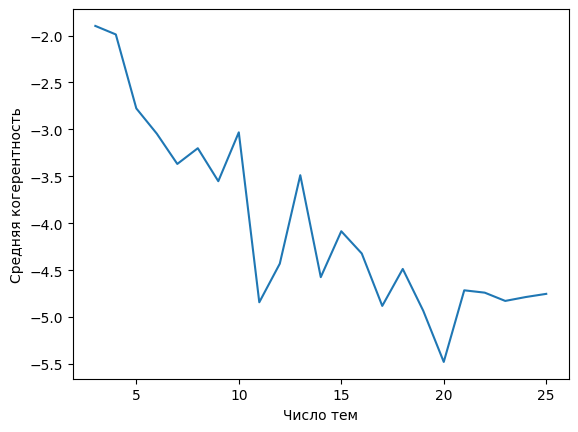

In [22]:
topics_list = list(range(3, 26))
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=150, update_every=1, passes=3)
    coherences.append(CoherenceModel(model=lda, texts=df['preprocessed_text'], dictionary=dictionary, coherence='u_mass').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [23]:
# беру 6 тем:

lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=6, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
vis_data.topic_info.Category

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


63     Default
25     Default
240    Default
83     Default
203    Default
        ...   
598    Topic6 
448    Topic6 
310    Topic6 
64     Topic6 
470    Topic6 
Name: Category, Length: 362, dtype: object

In [25]:
topic_names_list = vis_data.topic_info.Category.unique()

topic_names_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Default', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5',
       'Topic6'], dtype=object)

In [26]:
for topic_name in topic_names_list[1:]:
  print(list(vis_data.topic_info.loc[vis_data.topic_info.Category == topic_name].Term[:8]))

['заказ', 'доставка', 'озон', 'заказать', 'доставить', 'посылка', 'отмена', 'курьер']
['приобрести', 'квартира', 'час', 'мусор', 'коммунальный', 'продукт', 'сутки', 'возможно']
['служба', 'продажа', 'экспертиза', 'сервисный', 'упаковка', 'потребитель', 'вид', 'акт']
['договор', 'банк', 'билет', 'платёж', 'тариф', 'мтс', 'рейс', 'банковский']
['требование', 'покупатель', 'система', 'невозможно', 'списание', 'ответственность', 'код', 'образование']
['помещение', 'отход', 'жилой', 'ребёнок', 'температура', 'вентиляция', 'воздух', 'этаж']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Интерпретация получившихся тематик:

Вопросы, связанные с заказом и доставкой в Озон.

Вопросы, связанные с коммунальными службами.

Вопросы, связанные с экспертизой.

Вопросы, связанные с банком и связью.

Вопросы, связанные с образованием.

Вопросы. связанные с детьми.